In [18]:
import sys
import numpy as np
import pandas as pd



In [ ]:

!{sys.executable} -m pip install "kagglehub[pandas-datasets]"



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fashionmnist


In [6]:
import os
import pandas as pd

train_path = os.path.join(path, "fashion-mnist_train.csv")
test_path = os.path.join(path, "fashion-mnist_test.csv")
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [6]:
print(train_df.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [7]:
train_df.shape

(60000, 785)

In [9]:
test_df.shape

(10000, 785)

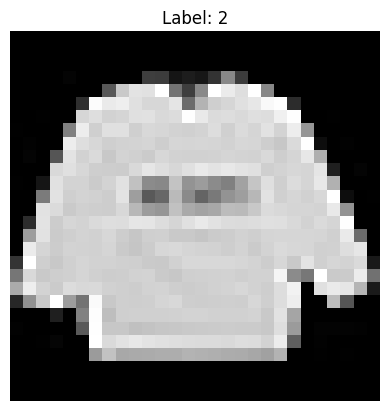

In [9]:
def show_image(index):
    label = train_df.iloc[index, 0]
    pixels = train_df.iloc[index, 1:].values.reshape(28, 28)
    plt.title(f"Label: {label}")
    plt.imshow(pixels, cmap='gray')
    plt.axis('off')
    plt.show()

show_image(0)

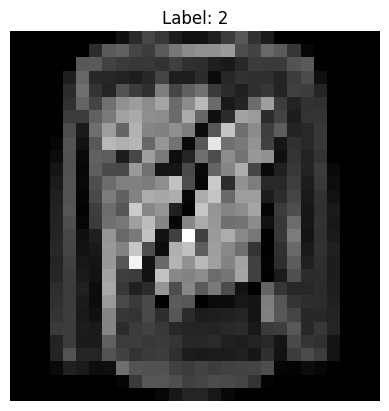

In [10]:
show_image(15)


In [11]:
X = train_df.iloc[:, 1:].values / 255.0
y = train_df['label'].values

X = X.reshape(-1, 28, 28, 1)
y = to_categorical(y, num_classes=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.7199 - loss: 0.7681 - val_accuracy: 0.8637 - val_loss: 0.3678
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.8615 - loss: 0.3849 - val_accuracy: 0.8872 - val_loss: 0.3104
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.8840 - loss: 0.3205 - val_accuracy: 0.8982 - val_loss: 0.2746
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.8927 - loss: 0.2944 - val_accuracy: 0.9018 - val_loss: 0.2642
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - accuracy: 0.9043 - loss: 0.2640 - val_accuracy: 0.9058 - val_loss: 0.2529
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.9113 - loss: 0.2389 - val_accuracy: 0.9082 - val_loss: 0.2521
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9166 - loss: 0.2224 - val_accuracy: 0.9140 - val_loss: 0.2384
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9251 - loss: 0.2049 - 

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9244 - loss: 0.2170
Validation Accuracy: 0.918


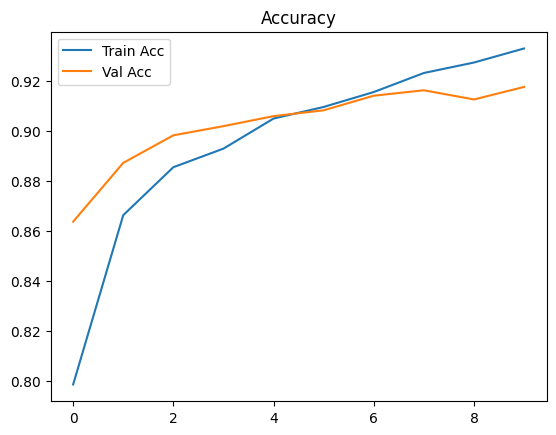

In [15]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc:.3f}")

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()

In [16]:
X_test = test_df.iloc[:, 1:].values / 255.0  # normalize
y_test = test_df['label'].values

X_test = X_test.reshape(-1, 28, 28, 1)

In [19]:
y_pred_probs = model.predict(X_test)


y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


<Figure size 800x600 with 0 Axes>

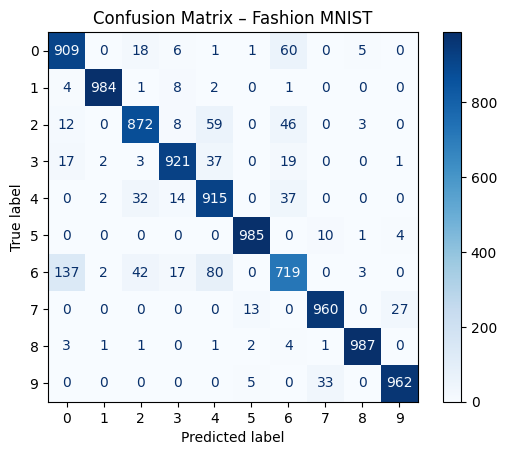

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix – Fashion MNIST")
plt.show()